In [1]:
from mpasanalysis import *
import e3sm_res_cmp
%matplotlib inline

In [78]:
# get paths of restart files, monthly mean output files, processed climatology files and output figures
# ts_ys = 1
# ts_ye = 20
# plt_ys = 20
# plt_ye = 20
# data_root = e3sm_res_cmp.load_paths_ocn(climo_ys=ts_ys, climo_ye=ts_ye,
#                                         ts_ys=ts_ys, ts_ye=ts_ye, runname='gl-mesh')
ts_ys = 21
ts_ye = 50
plt_ys = 21
plt_ye = 50
data_root = e3sm_res_cmp.load_paths_ocn(climo_ys=ts_ys, climo_ye=ts_ye,
                                        ts_ys=ts_ys, ts_ye=ts_ye, runname='low-res-cmp')

# ts_ys = 1
# ts_ye = 55
# plt_ys = 55
# plt_ye = 55
# data_root = e3sm_res_cmp.load_paths_ocn(climo_ys=ts_ys, climo_ye=ts_ye,
#                                         ts_ys=ts_ys, ts_ye=ts_ye, runname='high-res')
rst_root = data_root['rst_root']
climo_root = data_root['climo_root']
mon_root = data_root['mon_root']
fig_root = data_root['fig_root']
rst_file = rst_root+'/mpaso.rst.{:04d}-01-01_00000.nc'.format(ts_ye+1)
mon_file = mon_root+'/mpaso.hist.am.timeSeriesStatsMonthly.{:04d}-01-01.nc'.format(plt_ys+1)
varname = 'temperature'
# mon_file = climo_root+'/'+varname+'Tendency/mpaso_01_climo.nc'

Running on machine blueslogin3


In [79]:
if varname == 'salinity':
    units = 'psu/s'
elif varname == 'temperature':
    units = 'degC/s'

In [80]:
# load dataset
mpasmesh = MPASMesh(filepath=rst_file)
mpasodata = MPASOData(filepath=mon_file, filepath_mesh=rst_file)

Reading mesh data from /lcrc/group/acme/jwolfe/archive/20190509.A_WCYCL1950S_CMIP6_LRtunedHR.ne30_oECv3_ICG.anvil/rest/0051-01-01-00000/mpaso.rst.0051-01-01_00000.nc
Reading mesh data from /lcrc/group/acme/jwolfe/archive/20190509.A_WCYCL1950S_CMIP6_LRtunedHR.ne30_oECv3_ICG.anvil/rest/0051-01-01-00000/mpaso.rst.0051-01-01_00000.nc
Plotting map of temperature tendency - horizontal advection at   5.00 m (degC/s) at region 'LabSea'
Cell closest to P0: 307.32402 57.12352


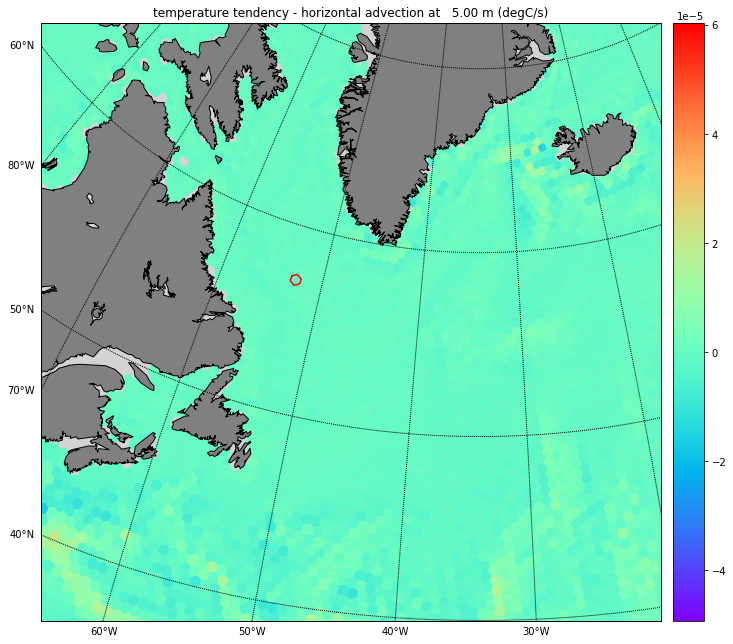

In [81]:
mpaso_vol_data = mpasodata.get_volume(varname='timeMonthly_avg_activeTracerHorizontalAdvectionTendency_'+varname+'HorizontalAdvectionTendency',
                                      name=varname+' tendency - horizontal advection', units=units)
plt.figure(figsize=[12,11])
m, f = mpaso_vol_data.get_map(depth=0.0).plot(region='LabSea', ptype='pcolor')

# select cell
lon_p0, lat_p0 = 307, 57
fmesh = mpasmesh.load()
lon_cell = np.degrees(fmesh.variables['lonCell'][:])
lat_cell = np.degrees(fmesh.variables['latCell'][:])
idx_cell = get_index_latlon(lon_p0, lat_p0, lon_cell, lat_cell)
print('Cell closest to P0: {:8.5f} {:8.5f}'.format(lon_cell[idx_cell], lat_cell[idx_cell]))
path_c = mpasmesh.get_closed_path_cell(idx_cell)
# plot paths
path_c.plot_edge(m, c='r')

Reading mesh data from /lcrc/group/acme/jwolfe/archive/20190509.A_WCYCL1950S_CMIP6_LRtunedHR.ne30_oECv3_ICG.anvil/rest/0051-01-01-00000/mpaso.rst.0051-01-01_00000.nc


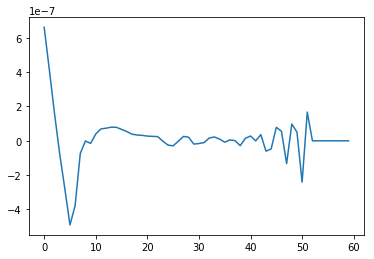

In [82]:
# read data
mpaso_tend_hadv = mpasodata.get_volume(varname='timeMonthly_avg_activeTracerHorizontalAdvectionTendency_'+varname+'HorizontalAdvectionTendency',
                                       name=varname+' tendency - horizontal advection', units=units)
tend_hadv = mpaso_tend_hadv.data[idx_cell,:]
plt.plot(tend_hadv)

Reading mesh data from /lcrc/group/acme/jwolfe/archive/20190509.A_WCYCL1950S_CMIP6_LRtunedHR.ne30_oECv3_ICG.anvil/rest/0051-01-01-00000/mpaso.rst.0051-01-01_00000.nc


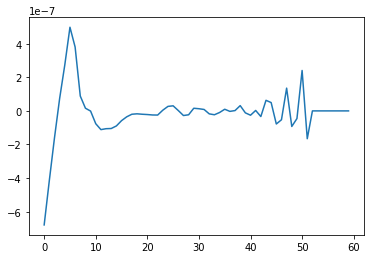

In [83]:
# read data
mpaso_tend_vadv = mpasodata.get_volume(varname='timeMonthly_avg_activeTracerVerticalAdvectionTendency_'+varname+'VerticalAdvectionTendency',
                                       name=varname+' tendency - vertical advection', units=units)
tend_vadv = mpaso_tend_vadv.data[idx_cell,:]
plt.plot(tend_vadv)

Reading mesh data from /lcrc/group/acme/jwolfe/archive/20190509.A_WCYCL1950S_CMIP6_LRtunedHR.ne30_oECv3_ICG.anvil/rest/0051-01-01-00000/mpaso.rst.0051-01-01_00000.nc


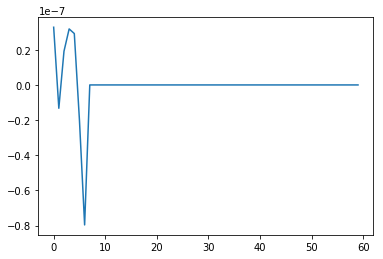

In [84]:
# read data
mpaso_tend_vmix = mpasodata.get_volume(varname='timeMonthly_avg_activeTracerVertMixTendency_'+varname+'VertMixTendency',
                                        name=varname+' tendency - vertical mixing', units=units)
tend_vmix = mpaso_tend_vmix.data[idx_cell,:]
plt.plot(tend_vmix)

Reading mesh data from /lcrc/group/acme/jwolfe/archive/20190509.A_WCYCL1950S_CMIP6_LRtunedHR.ne30_oECv3_ICG.anvil/rest/0051-01-01-00000/mpaso.rst.0051-01-01_00000.nc


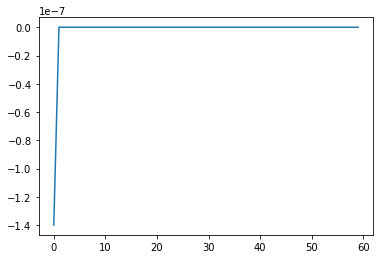

In [85]:
# read data
mpaso_tend_sflx = mpasodata.get_volume(varname='timeMonthly_avg_activeTracerSurfaceFluxTendency_'+varname+'SurfaceFluxTendency',
                                 name=varname+' tendency - surface flux', units=units)
tend_sflx = mpaso_tend_sflx.data[idx_cell,:]
plt.plot(tend_sflx)

Reading mesh data from /lcrc/group/acme/jwolfe/archive/20190509.A_WCYCL1950S_CMIP6_LRtunedHR.ne30_oECv3_ICG.anvil/rest/0051-01-01-00000/mpaso.rst.0051-01-01_00000.nc


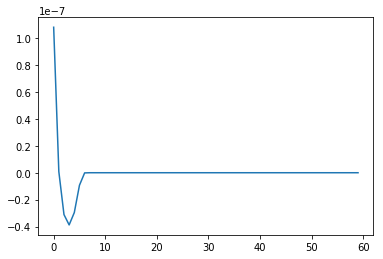

In [86]:
# read data
mpaso_tend_nloc = mpasodata.get_volume(varname='timeMonthly_avg_activeTracerNonLocalTendency_'+varname+'NonLocalTendency',
                                       name=varname+' tendency - non-local flux', units=units)
tend_nloc = mpaso_tend_nloc.data[idx_cell,:]
plt.plot(tend_nloc)

Reading mesh data from /lcrc/group/acme/jwolfe/archive/20190509.A_WCYCL1950S_CMIP6_LRtunedHR.ne30_oECv3_ICG.anvil/rest/0051-01-01-00000/mpaso.rst.0051-01-01_00000.nc


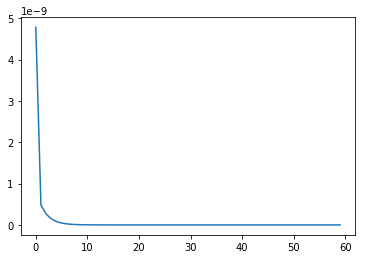

In [87]:
if varname == 'temperature':
    mpaso_tend_prad = mpasodata.get_volume(varname='timeMonthly_avg_temperatureShortWaveTendency',
                                           name='Shortwave tendency - non-local flux', units=units)
    tend_prad = mpaso_tend_prad.data[idx_cell,:]
else:
    tend_prad = np.zeros(tend_hadv.shape)
        
plt.plot(tend_prad)

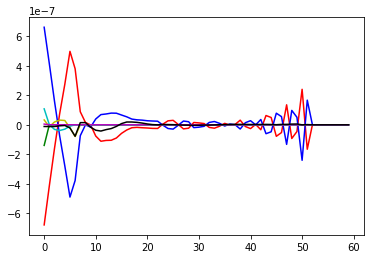

In [88]:
plt.plot(tend_vadv, '-r')
plt.plot(tend_hadv, '-b')
plt.plot(tend_vmix, '-y')
plt.plot(tend_sflx, '-g')
plt.plot(tend_nloc, '-c')
plt.plot(tend_prad, '-m')
plt.plot(tend_vadv+tend_hadv+tend_vmix+tend_sflx+tend_nloc+tend_prad, '-k')

In [65]:
np.sum(tend_hadv[0:10])

-1.6013335306731668e-06